<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica21_SergioTrejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
## Practica 21
---


## Datos del Estudiante

*   Apellidos y Nombre: Sergio Trejo
*   Matrícula: 261539
*   Enlace Repositorio Github: https://github.com/strejo4/ColabFiles_UACJ_PADP/blob/main/Practica21_SergioTrejo.ipynb
---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

Primeras filas del DataFrame: 
   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
Descripcion estadistica del conjunto de datos: 
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000
Valores nulos: 
poblation    0
profit       0
dtype: int64


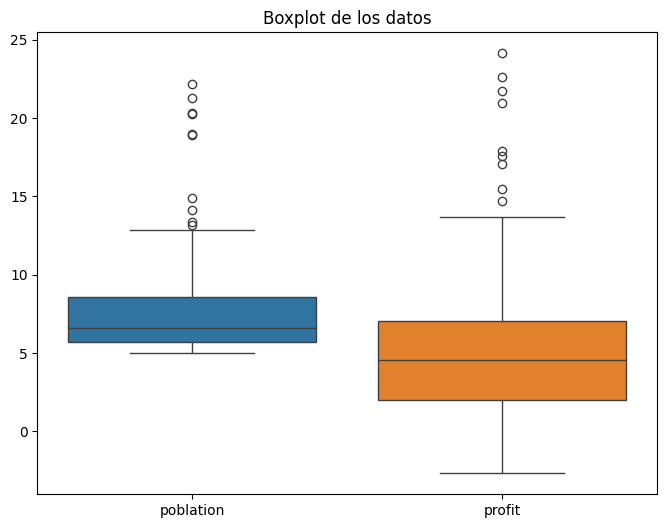

In [15]:
# Escribe tu código aquí

#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats

#Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

#Mostrar las primeras filas del df
print('Primeras filas del DataFrame: ')
print(df.head())

#Descripcion estadistica del conjunto de datos
print('Descripcion estadistica del conjunto de datos: ')
print(df.describe())
#verificacion de valores nulos
print('Valores nulos: ')
print(df.isnull().sum())

#Revision visual de outliers con boxplots
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.title('Boxplot de los datos')
plt.show()


**Interpretacion estadistica de los datos**

* El conjunto de los datos tiene dos variables numericas (poblation y profit)
  * La poblacion promedio es aproximadamente 8.16 con un rango de 5.03 a 22.20.
  * La ganancia promedio es de 5.51, pero existen valores negativos que indican perdidas.
  * La variabilidad es grande estre ambas variables lo que puede representar que las ciudades tienen tamaños y ganancias diferentes.
  * Las variables no muestran datos faltantes pero si muestran algunos outliers que tal vez son naturales que representan casos reales.

##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

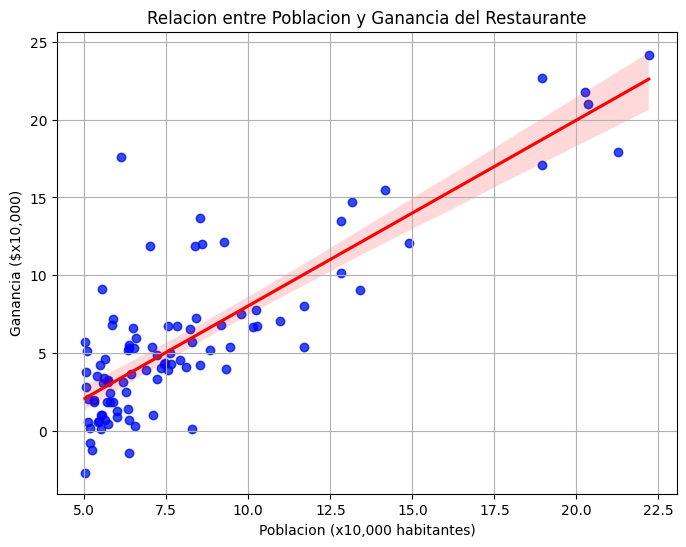

In [5]:
# Diagrama de dispersión
plt.figure(figsize=(8,6))
plt.scatter(df['poblation'], df['profit'], alpha=0.5)
sns.regplot(x='poblation', y='profit', data=df, scatter_kws={'color':'blue', 'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relacion entre Poblacion y Ganancia del Restaurante')
plt.xlabel('Poblacion (x10,000 habitantes)')
plt.ylabel('Ganancia ($x10,000)')
plt.grid(True)
plt.show()


**Interpretacion:**

* El grafico muestra una tendencia positiva entre poblation y profit. En otras palabras, cuando la poblacion aumenta, las ganancias del restaurante tambien aumentan o tienden a subir.

* Los puntos se alinean de forma mas o menos hacia arriba, aunque hay algo de dispersion, sobre todo en las ciudades mas grandes.

* En general, se puede decir que si hay una relacion lineal positiva, por lo que tiene sentido aplicar un modelos de regresion lineal simple para medir la realcion.

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

In [6]:
# Cálculo de correlación
corr = df['poblation'].corr(df['profit'])
print(f'Coeficiente de correlacion de Pearson: \n {corr:.4f}')

Coeficiente de correlacion de Pearson: 
 0.8379


**Interpretacion:**

* ¿Qué tan fuerte es la relación?
  * El valor de correlacion de Pearson mide que tan fuerte y en que direccion se relacionan las variables (-1 <= x <= 1) .
  * En este caso, el resultado es aproximadamente 0.8379, lo que indica una relacion positiva fuerte entre ambas variables.
* ¿Es positiva o negativa?
  * La relacion es positiva, cuando la poblacion aumenta, tambien aumentan las ganancias del resturante.
* ¿Es coherente con el gráfico anterior?
  * El signo positivo en la correlacion confirma lo que se observa en el grafico anterior. Una tendencia positiva y lineal. Por lo tanto, los datos muestran una correlacion fuerte y es coherente con la visualizacion del grafico de dispersion.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [8]:
# Construcción del modelo  y Coeficientes del modelo
#Definicion de las variables
x = df[['poblation']] # variable independiente
y = df['profit'] # variable objetivo

#Crear el modelo de regresion lineal
modelo = LinearRegression()

#Ajustar el modelo
modelo.fit(x, y)

#Obtener los parametros del modelo e imprimelos
intercepto = modelo.intercept_
pendiente = modelo.coef_[0]
print(f'Intercepto: {intercepto:.4f}')
print(f'Pendiente: {pendiente:.4f}')


Intercepto: -3.8958
Pendiente: 1.1930


**Interpretacion:**

* **Intercepto**: El intercepto representa la ganancia promedio estimada cuando la poblacion es igual a cero. En este caso no tiene un significado practico, por que no puede haber una ciudad sin habitantes, pero sirve como punto de referencia del modelo.

* **Pendiente**: Por cada aumento de 10,000 personas en la poblacion, las ganancias promedio der restaurante aumentan aproximadamente 1.19 unidades, es decir $11,900. Con mayor poblacion, mayores ganancias como se mostro en el analisis de correlacion.


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

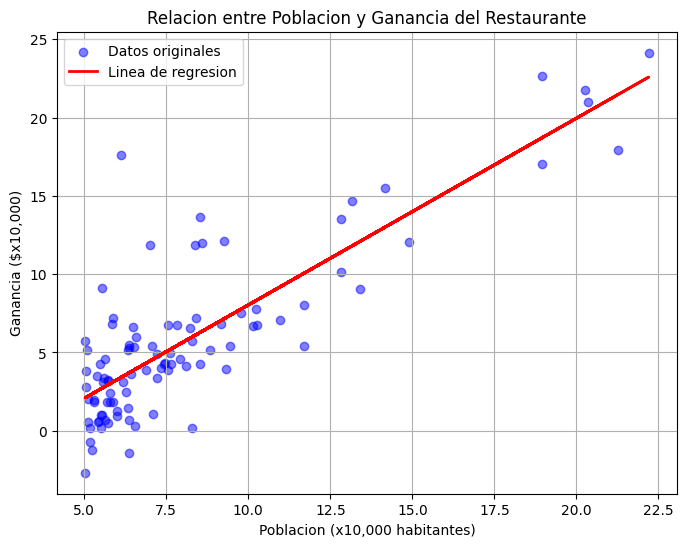

In [9]:
# Visualización del modelo ajustado
y_pred = modelo.predict(x)
plt.figure(figsize=(8,6))
plt.scatter(df['poblation'], df['profit'], color='blue', alpha=0.5, label='Datos originales')
plt.plot(df['poblation'], y_pred, color='red', linewidth=2, label='Linea de regresion')
plt.title('Relacion entre Poblacion y Ganancia del Restaurante')
plt.xlabel('Poblacion (x10,000 habitantes)')
plt.ylabel('Ganancia ($x10,000)')
plt.legend()
plt.grid(True)

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

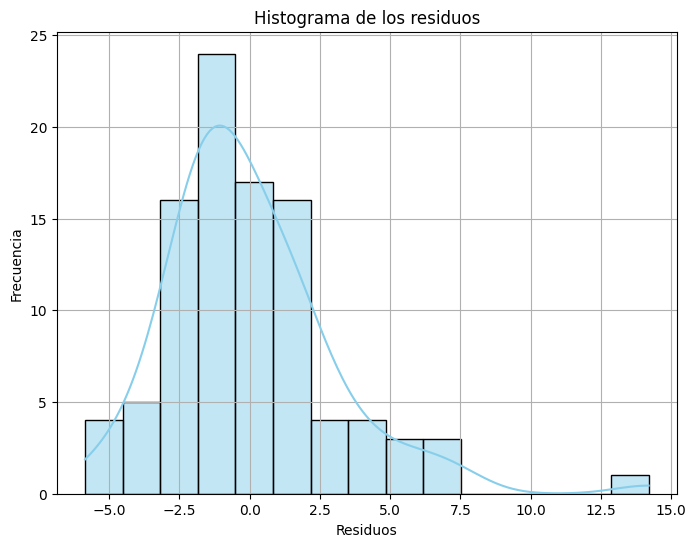

In [10]:
# Normalidad de los residuos
residuos = y-y_pred

#Grafica un histograma con KDE de los residuos
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, color='skyblue',bins=15)
plt.title('Histograma de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Interpretacion:**
* Los residuos representan la diferencia entre los valores reales, y los valores predichos por el modelo. En el histogreama se observa que la distribucion esta mas o menos centrada en cero, pero no es perfectamente simetrica.

* Hay algunos valores alejados del centro, lo que indica residuos no siguen completamente uns distribucion normal.

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

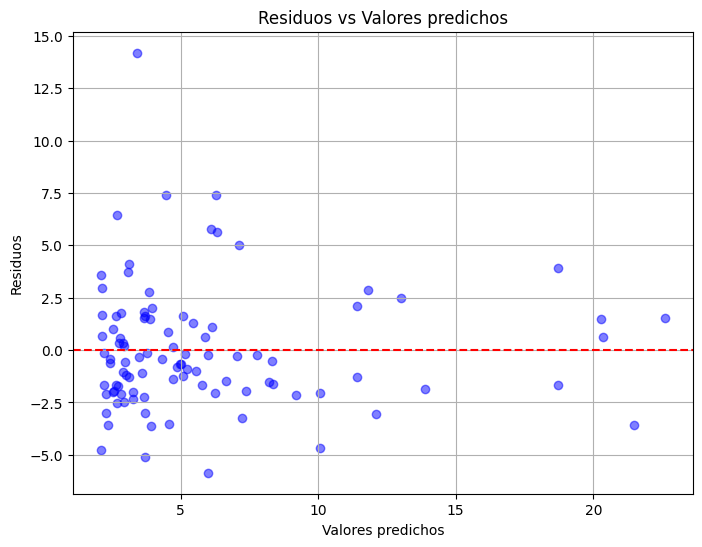

In [11]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores predichos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

**Interpretacion**

* Despues de haber calculado los residuos encontramos la diferencia entre lo que el modelo predijo y los datos reales.
* El grafico muestra que los valores estan dispersos aleatoriamente alrededor de la linea roja lo que significa que el modelo tiene buena homocedastididad y no hay un patron visible.

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

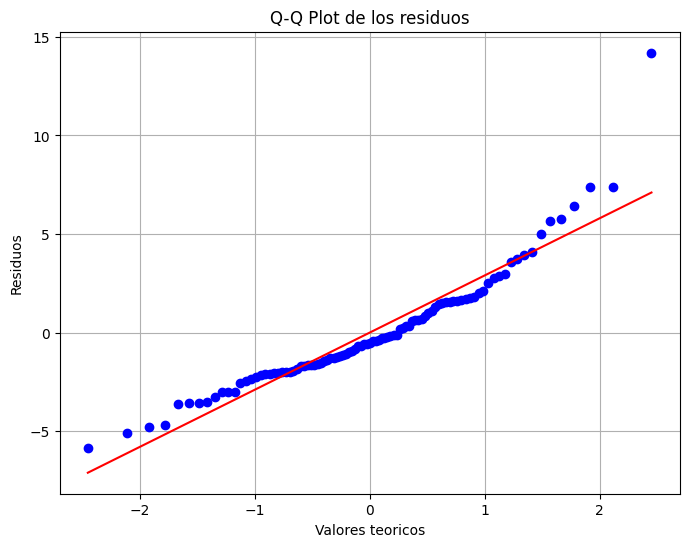

In [12]:
# Q-Q Plot
plt.figure(figsize=(8,6))
stats.probplot(residuos, dist='norm',plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.xlabel('Valores teoricos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

**Interpretacion**

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.
  * En el qq-plot se observa que la mayoria de los puntos se alinean de forma cercanaa la linea diagonal, lo que indica que los residuos siguen aproximadamente una distribucion normal.

b)Desviaciones sistemáticas indican asimetría o colas pesadas.
  * Los extremos del grafico los puntos se desvian ligeramente de la linea, lo que indica que existen colas algo mas largas o valores atipicos. Las desviaciones no son tan grandes pero muestran que la desviacion no es perfectamente normal.

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [13]:
# Evaluación del modelo
#Calculo de las metricas
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f'Error cuadratico medio (MSE): {mse:.4f}')
print(f'Raiz del error cuadratico medio (RMSE): {rmse:.4f}')
print(f'Coeficiente de determinacion (R^2): {r2:.4f}')


Error cuadratico medio (MSE): 8.9539
Raiz del error cuadratico medio (RMSE): 2.9923
Coeficiente de determinacion (R^2): 0.7020


**Interpretacion:**

1. MSE: Mide el promedio de las prediccioens para saber que tan lejos estan con respecto a los valores reales. Un valor bajo indica que el mejor modelo. En este caso, el MSE muestra que el modelo comete pocos errores grandes, y que la linea de regresion se ajusta bien a los datos.

2. RMSE: El RMSE tambien representa el error promedio del modelo, pero en las mismas unidades que la variable profit. En este caso, el RSME es cercano a 3 lo que significa que el modelo se equivoco por aproximadamente $30,000. Mientras mas bajo sea este valor, mejor.

3. R²: R² indica el porcentaje de variacion entre las variables profit y poblacion. En este ejemplo, R² tiene un porcentaje del 70% lo cual significa que el 70% de las diferencias entre ciudades se explican por el tamaño de la poblacion , el otro 30% depende de otros factores no considerados en el modelo. Cuanto mas cercano este a 1 o 100%, mejor explica el modelo los datos.

## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
   * En este caso, como contamos con dos variables numericas (una dependiente y otra independiente) uno de los modelos que mejor pueden funcionar, es el modelo de regresion lineal simple. Aqui este modelo resulta bastante util para la relacion de la poblacion con las ganancias del restaurante. Nos ayuda a visualizar la tendencia positiva, que significa que a mayor poblacion, mayor es la ganancia. El modelo ayuda a predecir el comportamiento general y puede servir como bases de decision si por ejemplo se quiere reubicar un restaurante en una zona mas poblada.

- ¿Qué limitaciones encuentras?
   * Tal vez una de las limitantes es que el data set solo tiene una variable independiente que en este caso es poblacion. Solo una varible explica las ganancias. No toma encuentra otros factores o variables, como precios de los platillos, calidad de la comida, servicio etc.

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el  ajuste.
   * En este caso no es necesario hacer un ajuste o estandarizacion por que solo se trabaja con una sola variable. Y ambas variables tienen de cierta manera la misma escala. La estandarizacion se vuelve critica para muchas variables en diferentes escalas o rangos.